<a href="https://colab.research.google.com/github/yuzzaf/Course-Machine-Learning/blob/main/UTS/UTS_ML_Regression_Linear_Boston_Housing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**UTS Machine Learning_Regression Linear_Boston Housing Dataset**


---


Nama: Muhammad Yuzzaf Ibrahim Azzumarafi

NIM: 1103200082



---
Dataset: [Boston Housing Dataset](https://www.kaggle.com/datasets/altavish/boston-housing-dataset)

Model: Regression Linear


**Collect Boston Housing Dataset from Google Drive**

`Prompt: berikan saya code untuk membaca folder di google drive '/Dataset/HousingData.csv' and put it in a pandas dataframe called "df" in google colab`



In [26]:
# Import necessary libraries
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
# Define the path to the CSV file in your Google Drive
file_path = '/content/drive/MyDrive/Dataset/HousingData.csv'

In [34]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


##**EDA**

EDA singkatan dari Exploratory Data Analysis, yang dalam Bahasa Indonesia dapat diterjemahkan sebagai Analisis Data Eksploratif. EDA adalah suatu pendekatan dalam analisis data yang bertujuan untuk menyelidiki dan memahami struktur, pola, serta karakteristik utama dari dataset secara visual dan deskriptif.**bold text**

In [35]:
#menampilkan info dataframe dari dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Output:


1.   Memiliki 506 Rows dengan 14 Columns
2.   semua berupa data numerical berupa float(12) dan integer(2)





In [81]:
#menampilkan statistik dari dataset yang digunakan
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,74.000000,74.0,74.000000,74.0,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,0.149797,0.0,7.969189,0.0,0.504432,6.142149,57.204054,4.049673,4.635135,309.864865,18.832432,393.553919,10.477162,22.275676
std,0.093940,0.0,2.879997,0.0,0.045485,0.323148,24.663047,1.387557,0.959085,68.984875,1.329240,3.932782,3.435615,3.367036
min,0.029850,0.0,2.180000,0.0,0.413000,5.569000,2.900000,2.106900,3.000000,193.000000,16.000000,383.230000,4.840000,16.200000
25%,0.070153,0.0,5.190000,0.0,0.465500,5.916250,40.025000,2.777800,4.000000,247.000000,17.900000,391.240000,7.750000,19.500000
50%,0.131895,0.0,8.560000,0.0,0.512500,6.087500,54.350000,3.945200,5.000000,296.000000,18.750000,395.080000,10.120000,21.650000
75%,0.212792,0.0,9.900000,0.0,0.544000,6.380500,79.200000,5.198425,5.000000,384.000000,19.600000,396.900000,12.905000,24.125000
max,0.402020,0.0,13.920000,0.0,0.585000,6.860000,97.100000,8.013600,6.000000,432.000000,20.900000,396.900000,18.660000,29.900000


In [82]:
#checking untuk null value pada setiap kolom
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [38]:
#menghapus null pada setiap kolom
df.dropna(inplace=True)

In [39]:
# Check again for missing values in each column
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

`Prompt: buatkan code countplot yang terdiri dari dataframe : 'CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV' `

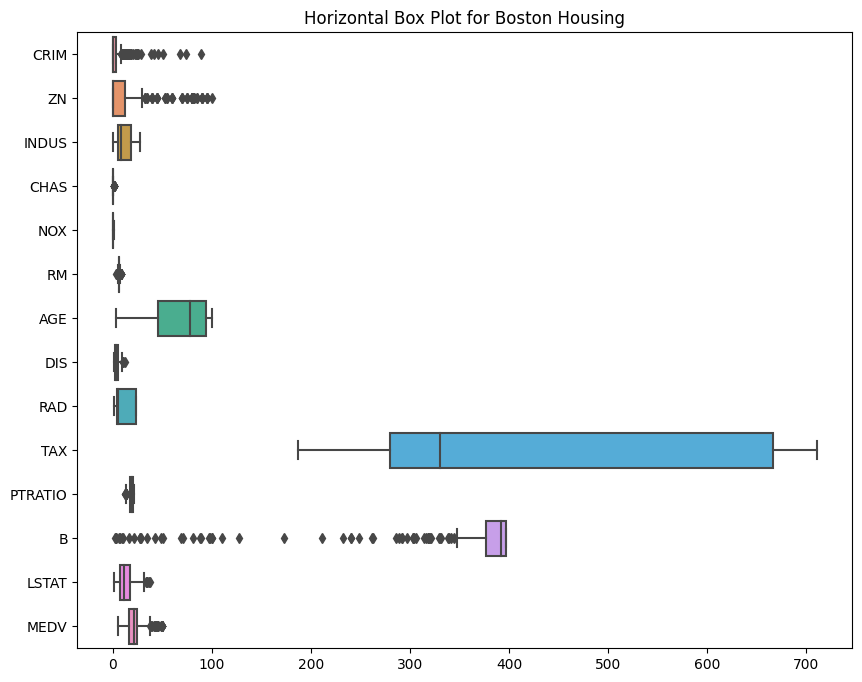

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Kolom-kolom yang ingin diplot
columns_to_plot = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

# Membuat horizontal boxplot dengan Seaborn
plt.figure(figsize=(10, 8))
sns.boxplot(data=df[columns_to_plot], orient='h')
plt.title('Horizontal Box Plot for Boston Housing')
plt.show()

`Prompt: give me a code to remove the outliers from features with box plot make it horizontal`

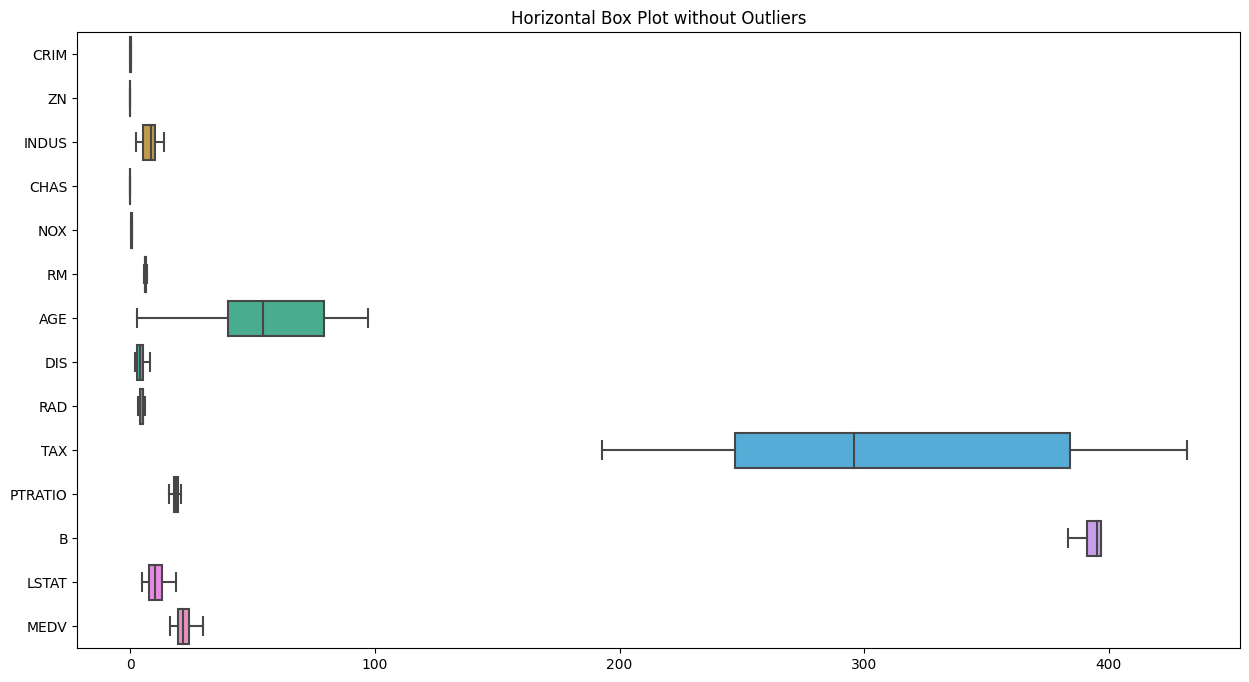

In [63]:
# Fungsi untuk menghapus outliers berdasarkan IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Hapus outliers untuk setiap kolom
for column in columns_to_plot:
    df = remove_outliers(df, column)

# Membuat horizontal box plot tanpa outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[columns_to_plot], orient='h')
plt.title('Horizontal Box Plot without Outliers')
plt.show()

##**Data Visualization**
Data visualization, atau visualisasi data, adalah proses menggambarkan data secara grafis untuk membantu pemahaman dan analisis. Dalam konteks ini, informasi atau data yang diberikan direpresentasikan secara visual menggunakan elemen-elemen seperti grafik, diagram, dan peta. Tujuan utama dari visualisasi data adalah untuk menyajikan data dengan cara yang mudah dipahami, memudahkan identifikasi pola, tren, dan hubungan dalam data.

`Prompt: buatkan data visualizationsnya dengan dataframe yang sudah disediakan`

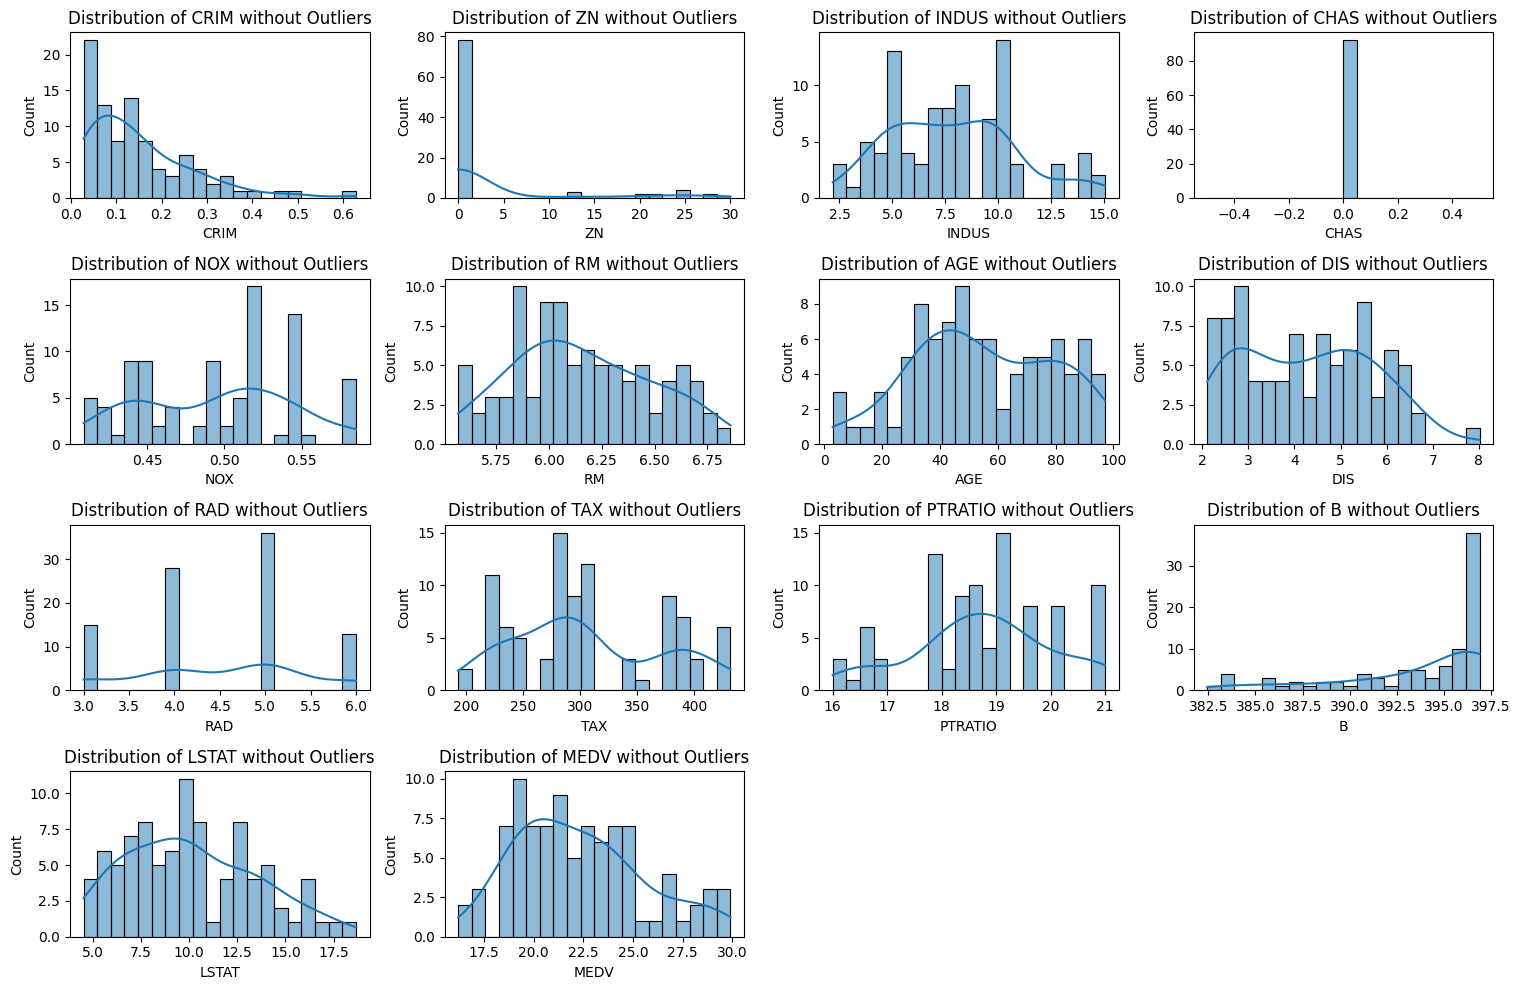

In [59]:
# Visualisasi distribusi setelah menghapus outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Distribution of {column} without Outliers')

plt.tight_layout()
plt.show()

`Prompt: buatkan pairplot visualisasinya dengan dataframe yang sudah disediakan`

<Figure size 1500x1000 with 0 Axes>

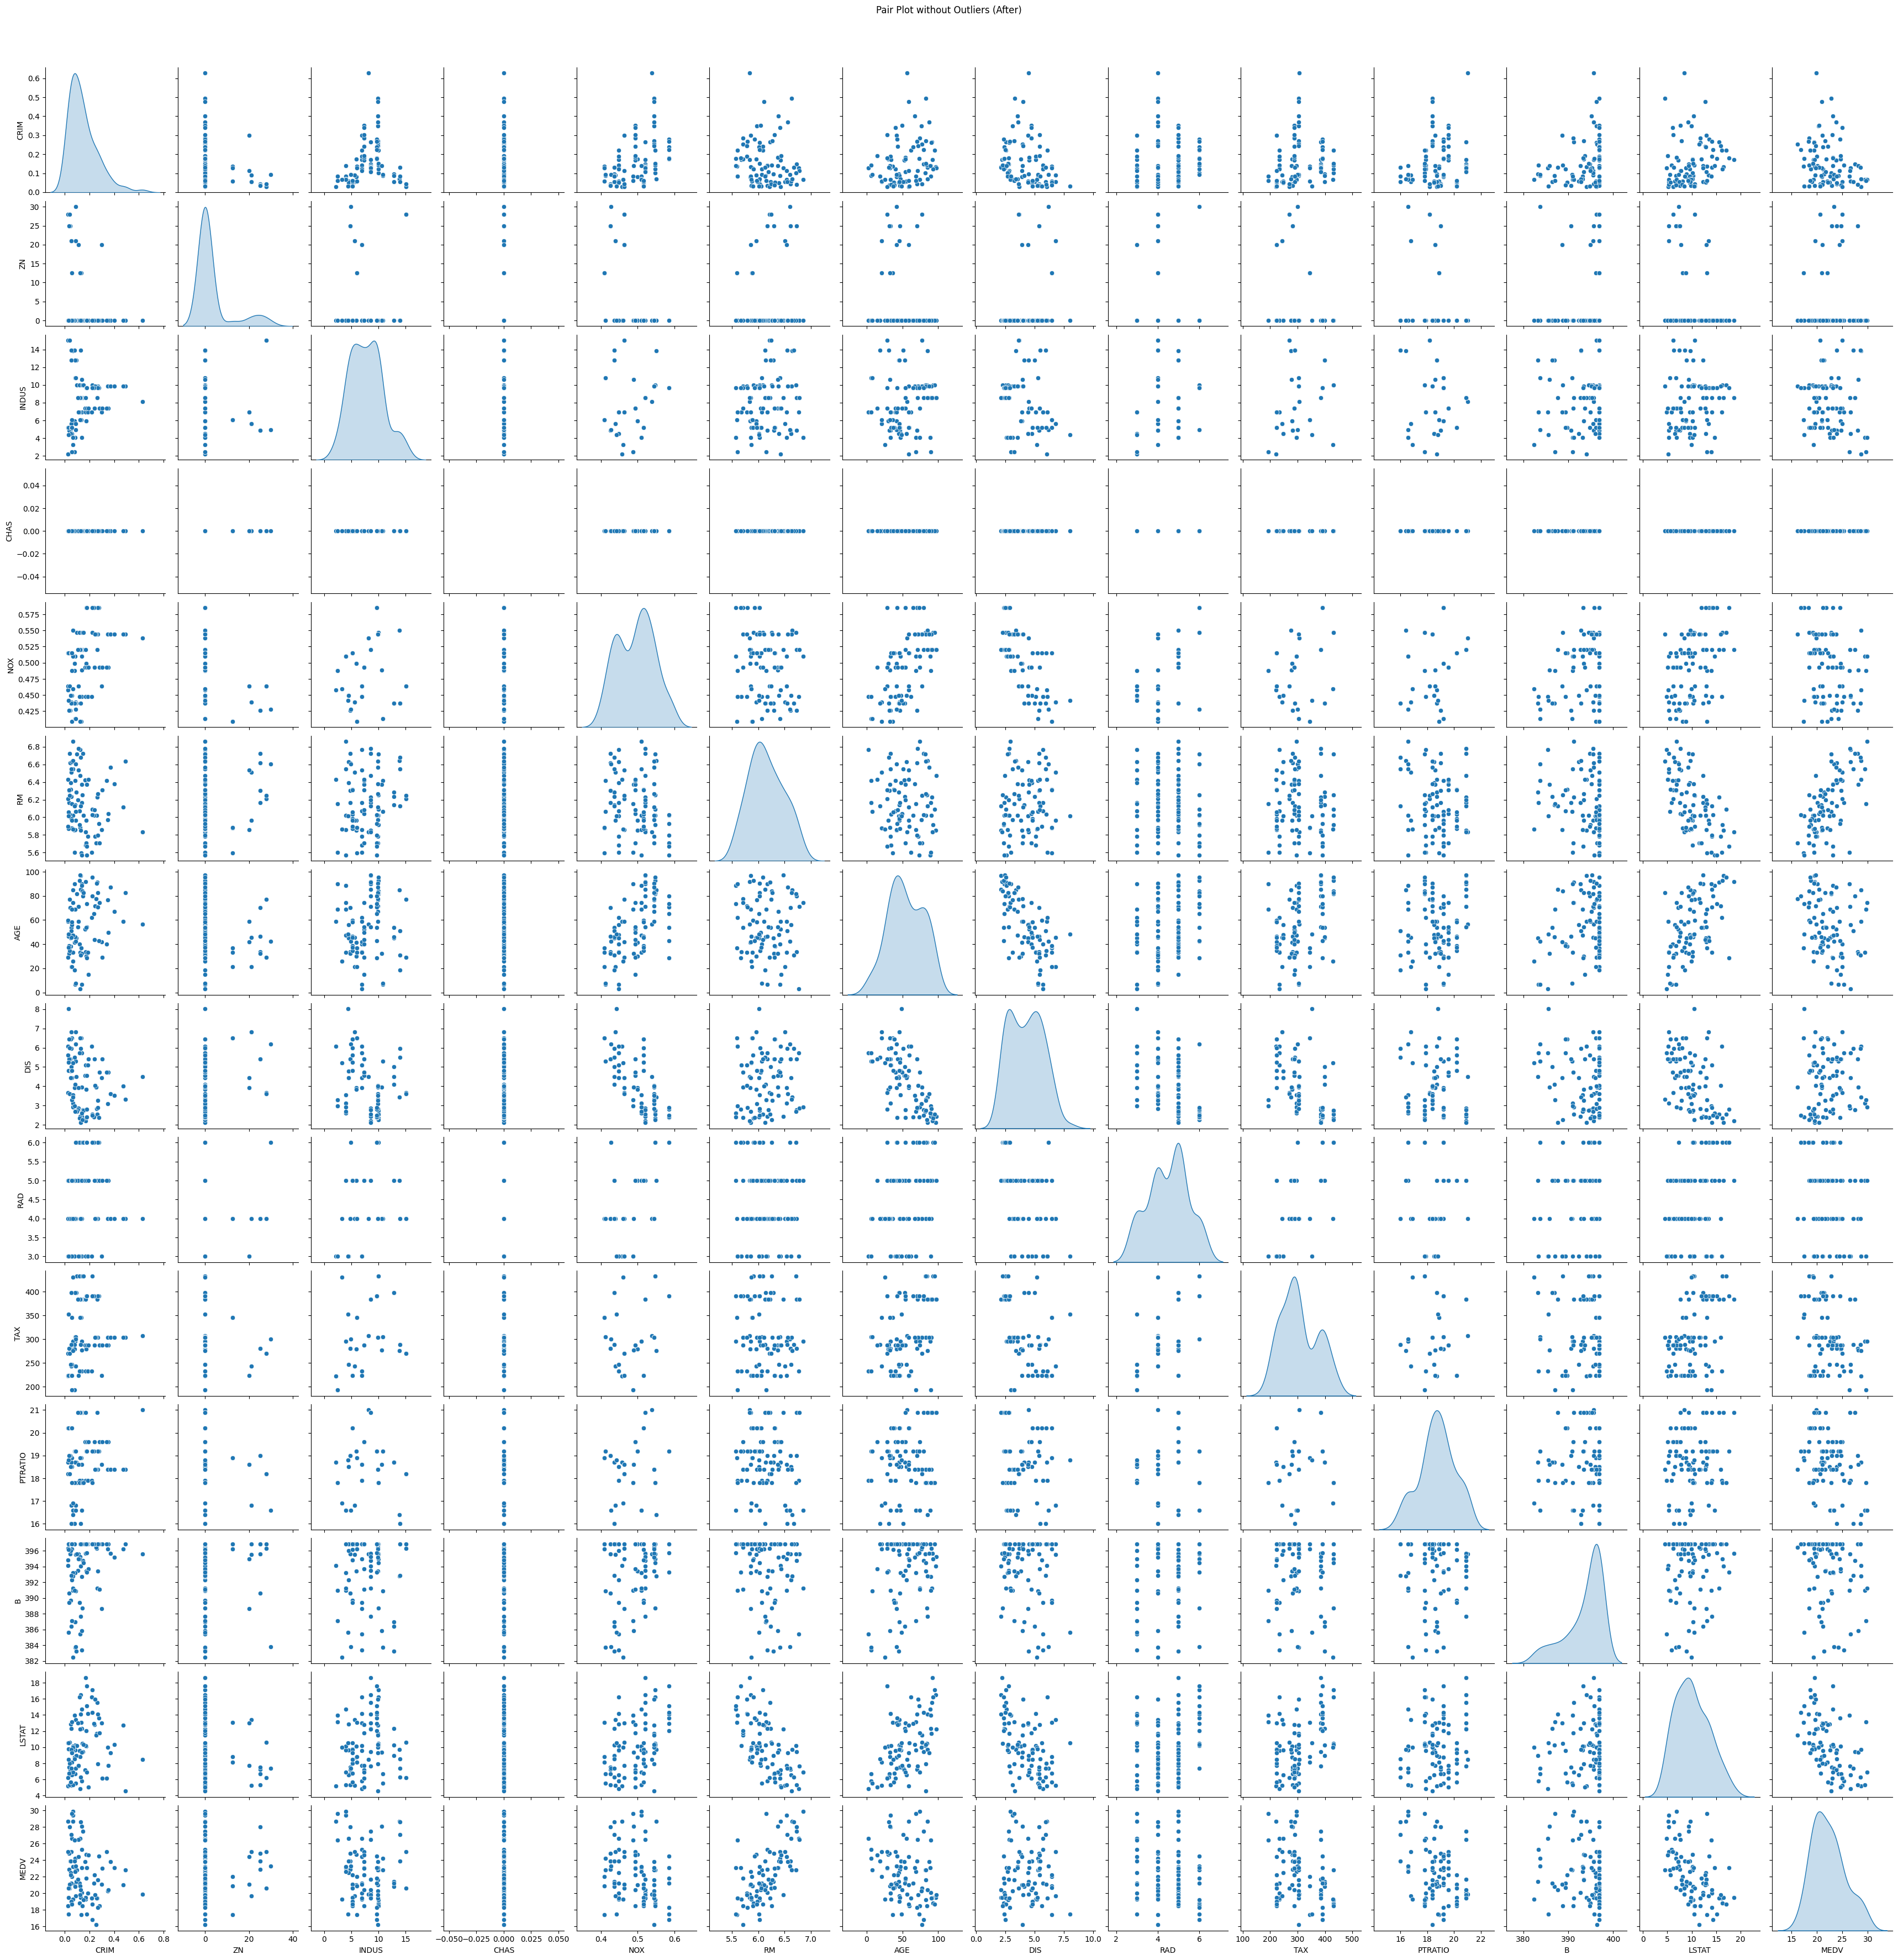

In [60]:
# Membuat pair plot dengan Seaborn tanpa outliers
plt.figure(figsize=(15, 10))
sns.pairplot(df[columns_to_plot], diag_kind='kde')
plt.suptitle('Pair Plot without Outliers (After)', y=1.02)
plt.show()

`Prompt: buatkan heatmap visualisasinya dengan dataframe yang sudah disediakan`

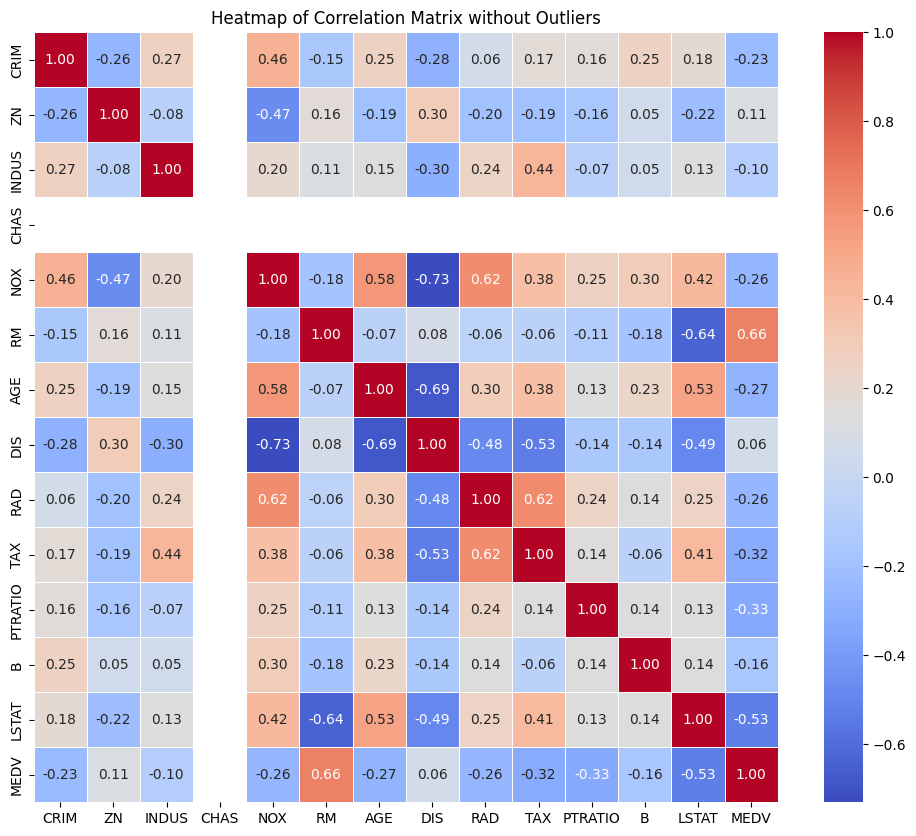

In [61]:
# Menghitung matriks korelasi setelah menghapus outliers
correlation_matrix = df[columns_to_plot].corr()

# Membuat heatmap visualisasi korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Correlation Matrix without Outliers')
plt.show()

##**Training dengan Regression Linear**

Regression Linear Training merujuk pada proses melatih model regresi linear. Regresi linear adalah metode statistik yang digunakan untuk memodelkan hubungan linier antara satu atau lebih variabel independen (fitur) dan variabel dependen (target). Tujuannya adalah membuat model yang dapat memprediksi nilai target berdasarkan nilai fitur.

`Prompt: buatkan saya code untuk train dataset dengan regression linear dan tampilkan visualisasinya dengan semua Target kecuali MEDV`

In [64]:
##Library yang digunakan untuk Regression Linear Training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Mean Squared Error (Train): 6.635096443915204
Mean Squared Error (Test): 6.572309688285553


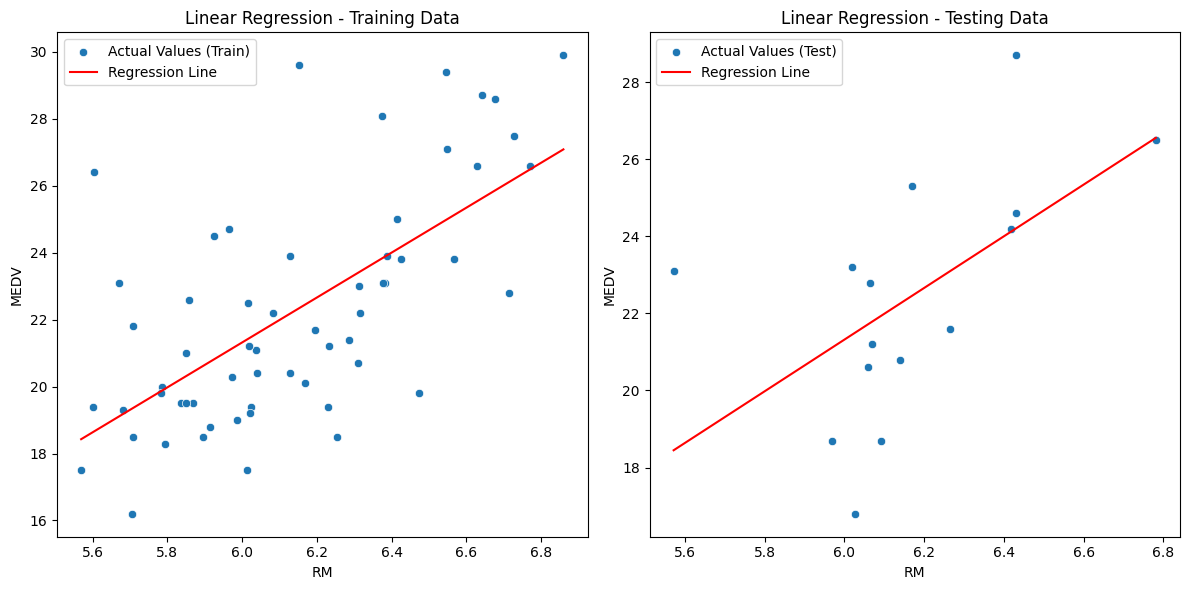

In [72]:
# Pilih fitur dan target
feature = 'RM'
target = 'MEDV'

# Membagi data menjadi data latih dan data uji
X = df[[feature]]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model regresi linear dan melatihnya
model = LinearRegression()
model.fit(X_train, y_train)

# Membuat prediksi
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Menghitung MSE untuk data latih dan data uji
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error (Train): {mse_train}')
print(f'Mean Squared Error (Test): {mse_test}')

# Visualisasi hasil regresi linear
plt.figure(figsize=(12, 6))

# Scatter plot data latih
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_train[feature], y=y_train, label='Actual Values (Train)')
sns.lineplot(x=X_train[feature], y=y_pred_train, color='red', label='Regression Line')
plt.title('Linear Regression - Training Data')
plt.xlabel(feature)
plt.ylabel(target)
plt.legend()

# Scatter plot data uji
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test[feature], y=y_test, label='Actual Values (Test)')
sns.lineplot(x=X_test[feature], y=y_pred_test, color='red', label='Regression Line')
plt.title('Linear Regression - Testing Data')
plt.xlabel(feature)
plt.ylabel(target)
plt.legend()

plt.tight_layout()
plt.show()

In [71]:
# Hapus outliers untuk setiap kolom
columns_to_plot = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
for column in columns_to_plot:
    df = remove_outliers(df, column)

# Pilih semua fitur kecuali target 'MEDV'
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Membuat prediksi
y_pred = model.predict(X_test)

# Menghitung MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Jika Anda ingin melihat koefisien dan intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Mean Squared Error: 6.472756700439235
Coefficients: [ 8.74519158e-01  3.17121329e-13 -2.46504135e-02  4.44366766e-14
 -8.20434885e+00  8.02933031e+00 -6.23676582e-02 -1.40961937e+00
  6.17626980e-01 -2.99325903e-02 -7.69093365e-01 -9.23983823e-02
  3.36845813e-01]
Intercept: 40.20743312305493


##**New Data Input Test**

In [80]:
# Pilih fitur dan target
feature = 'RM'
target = 'MEDV'

# Membagi data menjadi data latih dan data uji
X = df[[feature]]
y = df[target]

# Membuat dan melatih model regresi linear
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

# Contoh data baru untuk diprediksi
new_data = {'RM': [6.5, 7.2, 5.8],
            'LSTAT': [10, 5, 15]}

# Membuat DataFrame dari data baru
new_df = pd.DataFrame(new_data)

# Melakukan prediksi menggunakan model regresi linear yang telah dilatih
# Pastikan bahwa kolom pada new_df sesuai dengan fitur-fitur yang digunakan saat melatih model
columns_used_in_training = ['RM']
new_df = new_df[columns_used_in_training]

# Menampilkan hasil prediksi
predictions = model.predict(new_df)
result_df = pd.DataFrame({'RM': new_df['RM'], 'Predicted_MEDV': predictions})
print(result_df)

    RM  Predicted_MEDV
0  6.5       24.656993
1  7.2       29.315133
2  5.8       19.998852
